In [1]:
from u_shaped_lib import CSH, OSA, beatnote_drift as bd, HighFinesse_FN as HF #Modified data is used, so we load CSH and not CSH_unmodified (where division with prop factor is needed)
import matplotlib.pyplot as plt
import numpy as np
import tabulate
import sys
import os
import pandas as pd


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\u_shaped_lib\OSA.py:67: RuntimeWarning: invalid value encountered in log10
  power = 10*np.log10(power)


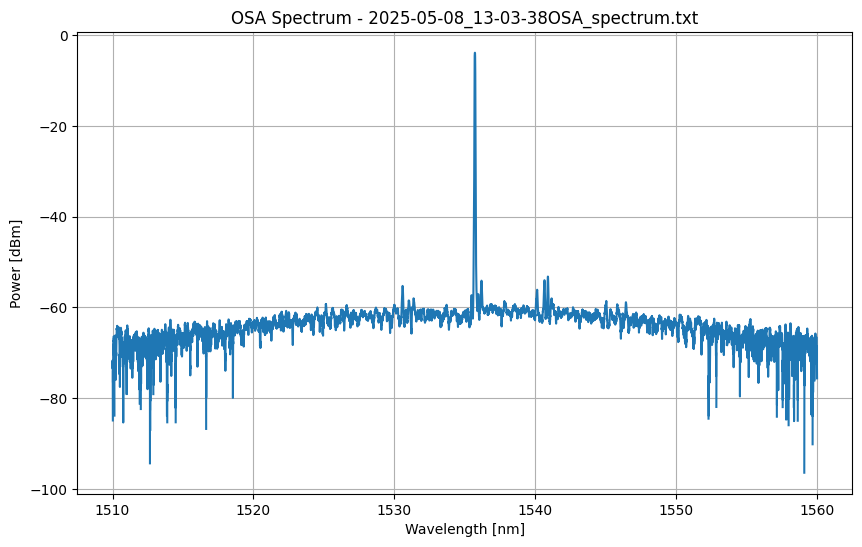

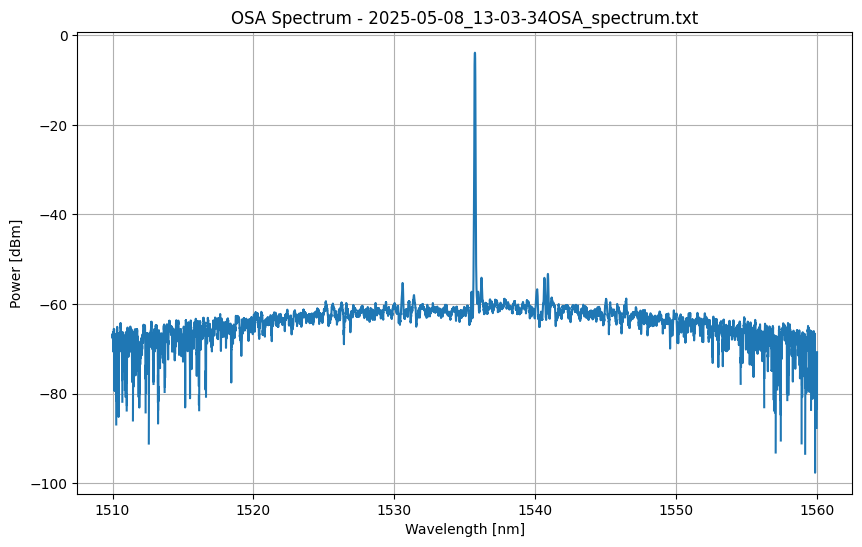

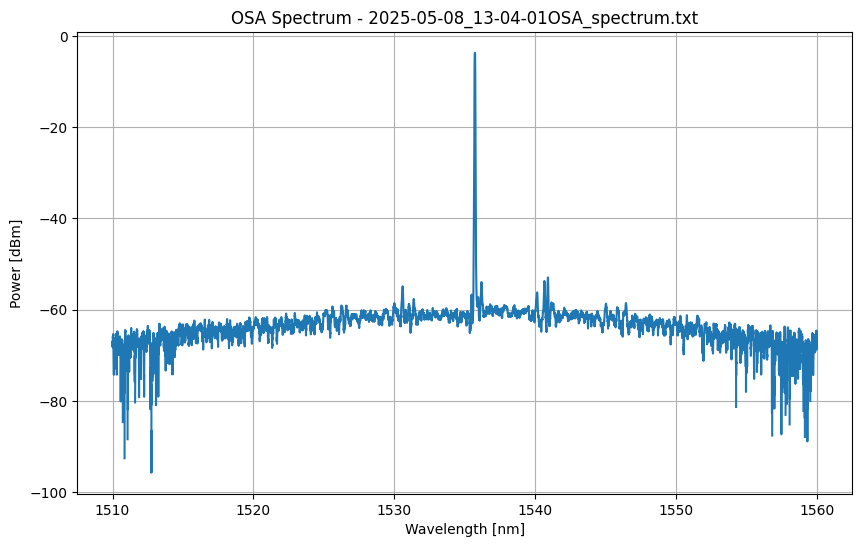

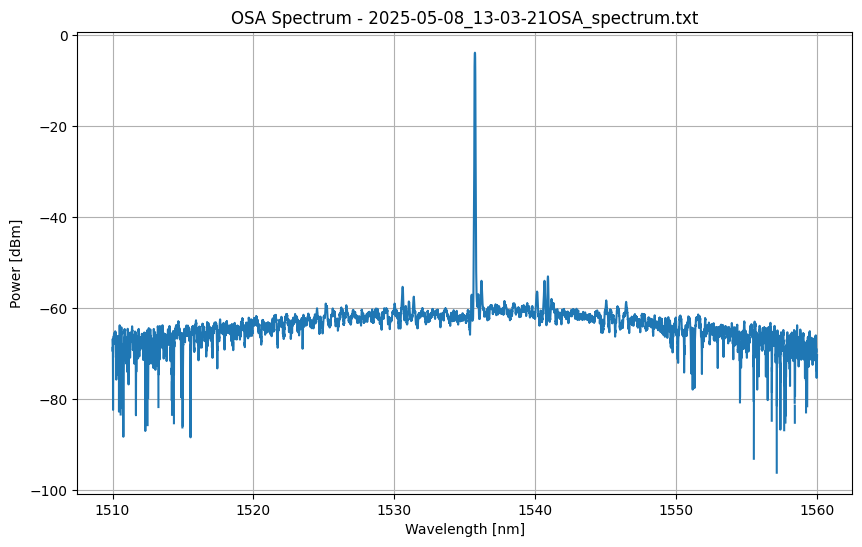

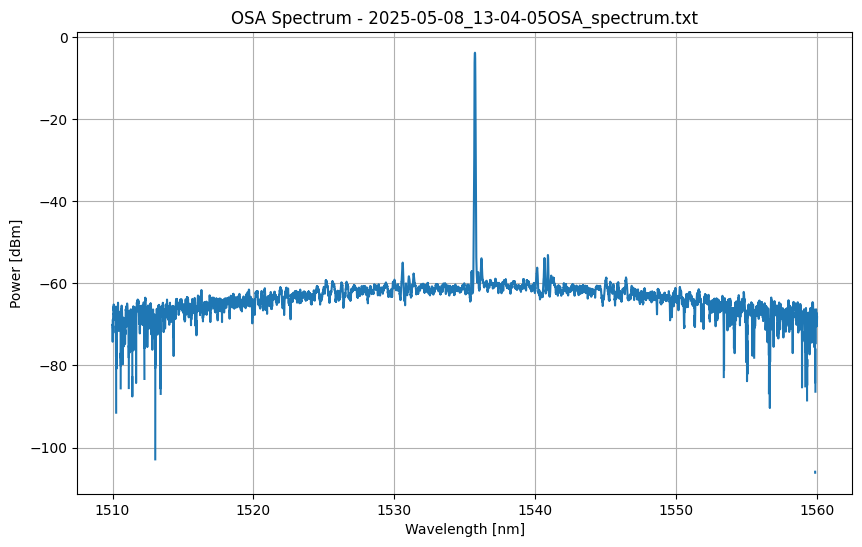

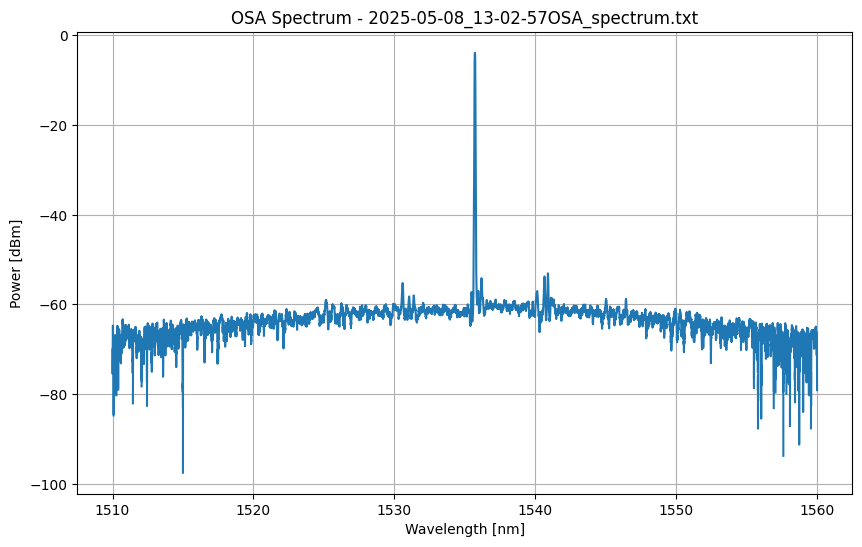

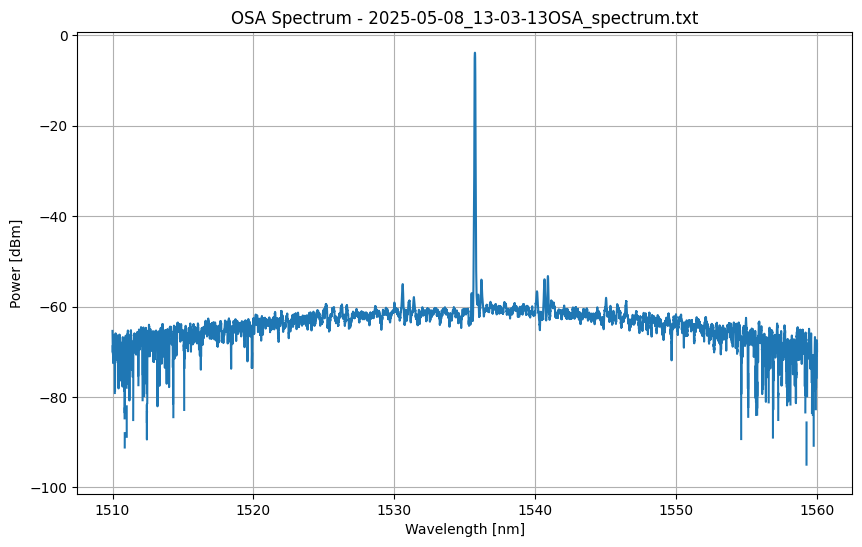

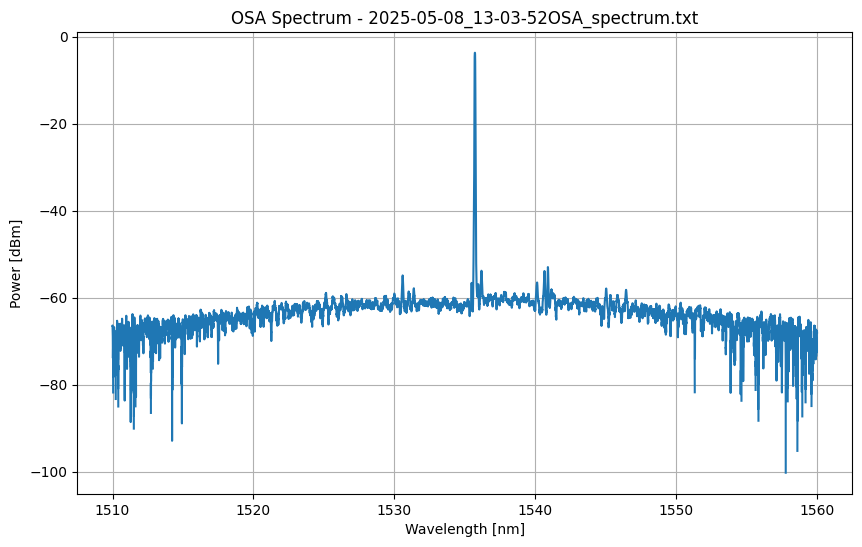

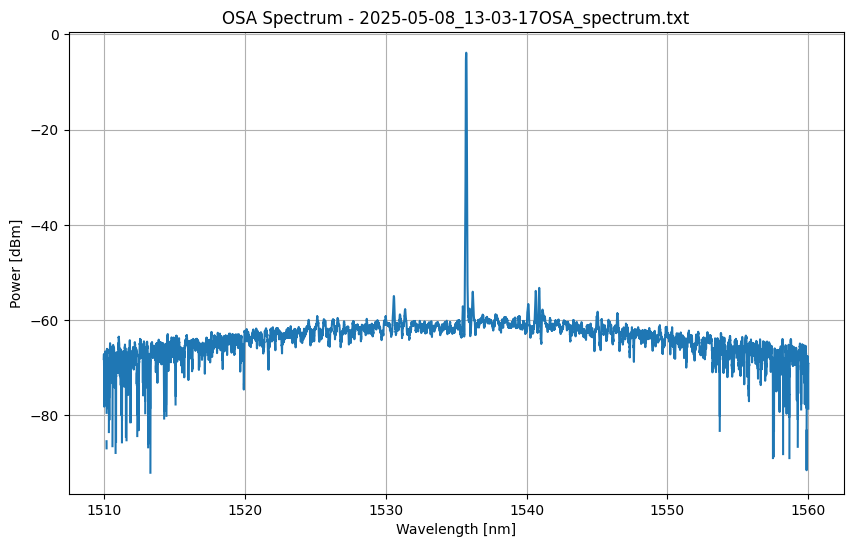

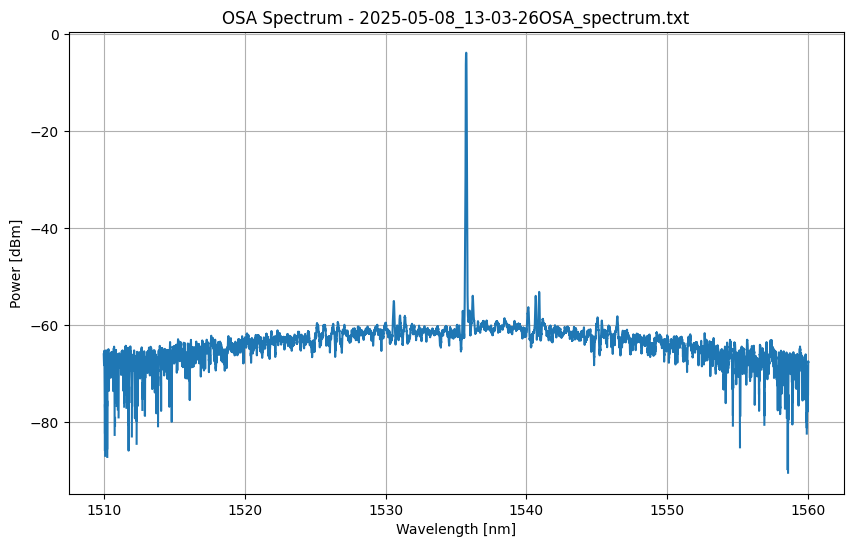

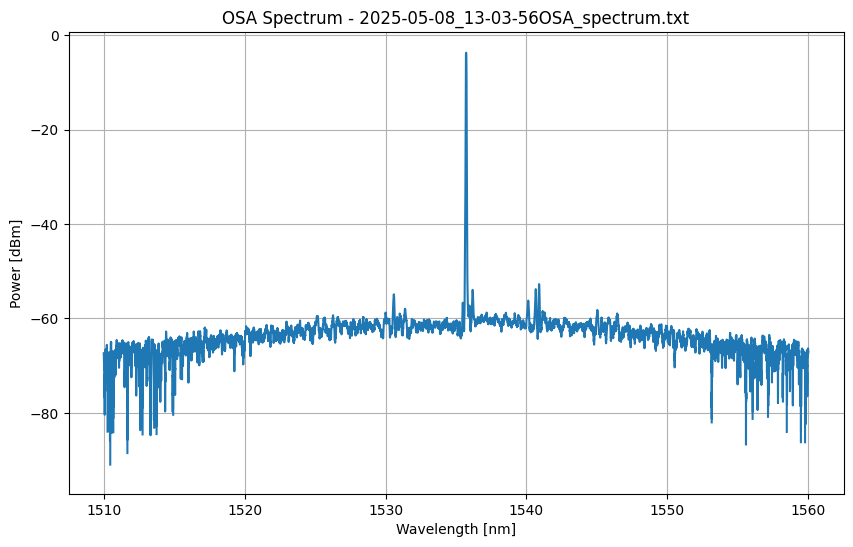

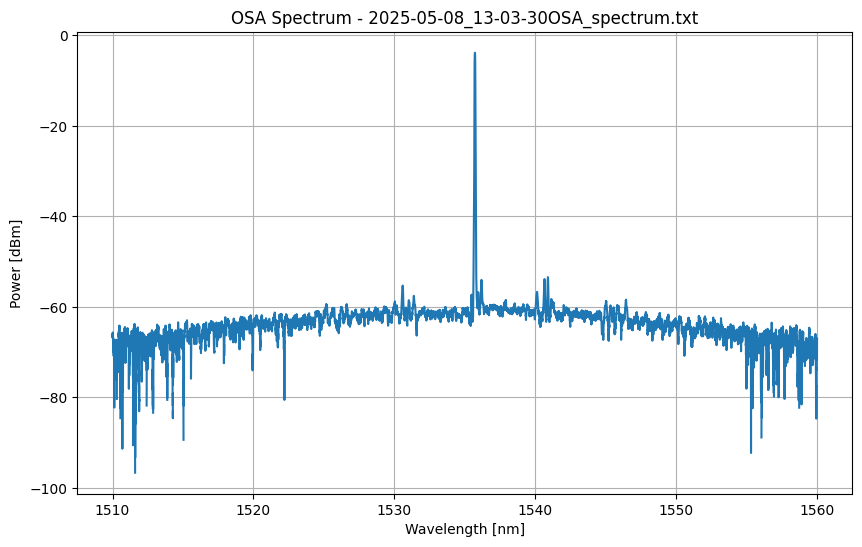

[(array([1510.   , 1510.002, 1510.004, ..., 1559.996, 1559.998, 1560.   ]),
  array([-71.7791257 , -71.73819403, -72.19494688, ..., -72.23735843,
         -75.19839931, -75.66192355]),
  {'# Center wavelength': 1535.72,
   '# Peak power': 0.407496,
   '# Feedback_power': 0.0},
  '2025-05-08_13-03-38OSA_spectrum.txt'),
 (array([1510.   , 1510.002, 1510.004, ..., 1559.996, 1559.998, 1560.   ]),
  array([-66.99234505, -66.98166294, -67.11071566, ..., -76.16627267,
         -72.31880313, -70.7737903 ]),
  {'# Center wavelength': 1535.72,
   '# Peak power': 0.407862,
   '# Feedback_power': 0.0},
  '2025-05-08_13-03-34OSA_spectrum.txt'),
 (array([1510.   , 1510.002, 1510.004, ..., 1559.996, 1559.998, 1560.   ]),
  array([-67.90379376, -67.88568889, -67.53118043, ..., -68.08970042,
         -68.14635724, -68.56748274]),
  {'# Center wavelength': 1535.72,
   '# Peak power': 0.424417,
   '# Feedback_power': 0.0},
  '2025-05-08_13-04-01OSA_spectrum.txt'),
 (array([1510.   , 1510.002, 1510.004, .

In [2]:
OSA_dir = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Weird_data_new_params\OSA"
OSA.process_and_plot_osa_data(OSA_dir)

In [3]:
dir_200_old = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Old_lensed_fiber\200 counts"
dir_200_new = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\200 counts"
dir_200_new_1535 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Weird_data_new_params\CSH\200 counts"
dir_200_new_1535_no_TEC = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Weird_data_new_params\CSH\200_counts_no_TEC"

dir_hf_old = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Old_lensed_fiber\HighFinesse"
dir_hf_new = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\HighFinesse"
dir_hf_new_1535 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Weird_data_new_params\HighFinesse"

data_200_old = CSH.get_data(dir_200_old)

data_200_new = CSH.get_data(dir_200_new)

data_200_new_1535 = CSH.get_data(dir_200_new_1535)

data_200_new_1535_no_TEC = CSH.get_data(dir_200_new_1535_no_TEC)

data_hf_old = HF.get_data(dir_hf_old)

data_hf_new = HF.get_data(dir_hf_new) 

data_hf_new_1535 = HF.get_data(dir_hf_new_1535)


In [4]:
stat_200_old = np.array([np.average(data_200_old[0]),np.std(data_200_old[0])])*1e-3
stat_200_new = np.array([np.average(data_200_new[0]),np.std(data_200_new[0])])*1e-3
stat_200_new_1535 = np.array([np.average(data_200_new_1535[0]),np.std(data_200_new_1535[0])])*1e-3
stat_200_new_1535_no_TEC = np.array([np.average(data_200_new_1535_no_TEC[0]),np.std(data_200_new_1535_no_TEC[0])])*1e-3

stat_hf_old = np.array([np.average(data_hf_old[0]),np.std(data_hf_old[0])])*1e-3
stat_hf_new = np.array([np.average(data_hf_new[0]),np.std(data_hf_new[0])])*1e-3
stat_hf_new_1535 = np.array([np.average(data_hf_new_1535[0]),np.std(data_hf_new_1535[0])])*1e-3

stat_data =[['200 counts old',stat_200_old[0],stat_200_old[1]],['HF old',stat_hf_old[0],stat_hf_old[1]],
            ['200 counts new',stat_200_new[0],stat_200_new[1]],['HF new',stat_hf_new[0],stat_hf_new[1]],
            ['200 counts new 1535',stat_200_new_1535[0],stat_200_new_1535[1]],['HF new 1535',stat_hf_new_1535[0],stat_hf_new_1535[1]],
            ['200 counts new 1535 no TEC',stat_200_new_1535_no_TEC[0],stat_200_new_1535_no_TEC[1]]]

table = tabulate.tabulate(stat_data,headers=['Type','Average [kHz]','Std [kHz]'],tablefmt='grid')
print(table)

# plt.figure()
# plt.plot(data_200_old[0],'.',label='200 counts old' )
# plt.plot(data_200_new[0],'.',label='200 counts new')
# plt.plot(data_hf_old[0],'.',label='HF old')
# plt.plot(data_hf_new[0],'.',label='HF new')
# plt.yscale('log')
# plt.legend()


+----------------------------+-----------------+-------------+
| Type                       |   Average [kHz] |   Std [kHz] |
+============================+=================+=============+
| 200 counts old             |       104.189   |  58.6089    |
+----------------------------+-----------------+-------------+
| HF old                     |         5.01042 |   3.03679   |
+----------------------------+-----------------+-------------+
| 200 counts new             |        20.3859  |   5.29521   |
+----------------------------+-----------------+-------------+
| HF new                     |         1.24007 |   0.0139882 |
+----------------------------+-----------------+-------------+
| 200 counts new 1535        |        10.0659  |   5.58745   |
+----------------------------+-----------------+-------------+
| HF new 1535                |         1.07657 |   0.0107434 |
+----------------------------+-----------------+-------------+
| 200 counts new 1535 no TEC |         8.11791 |   3.02

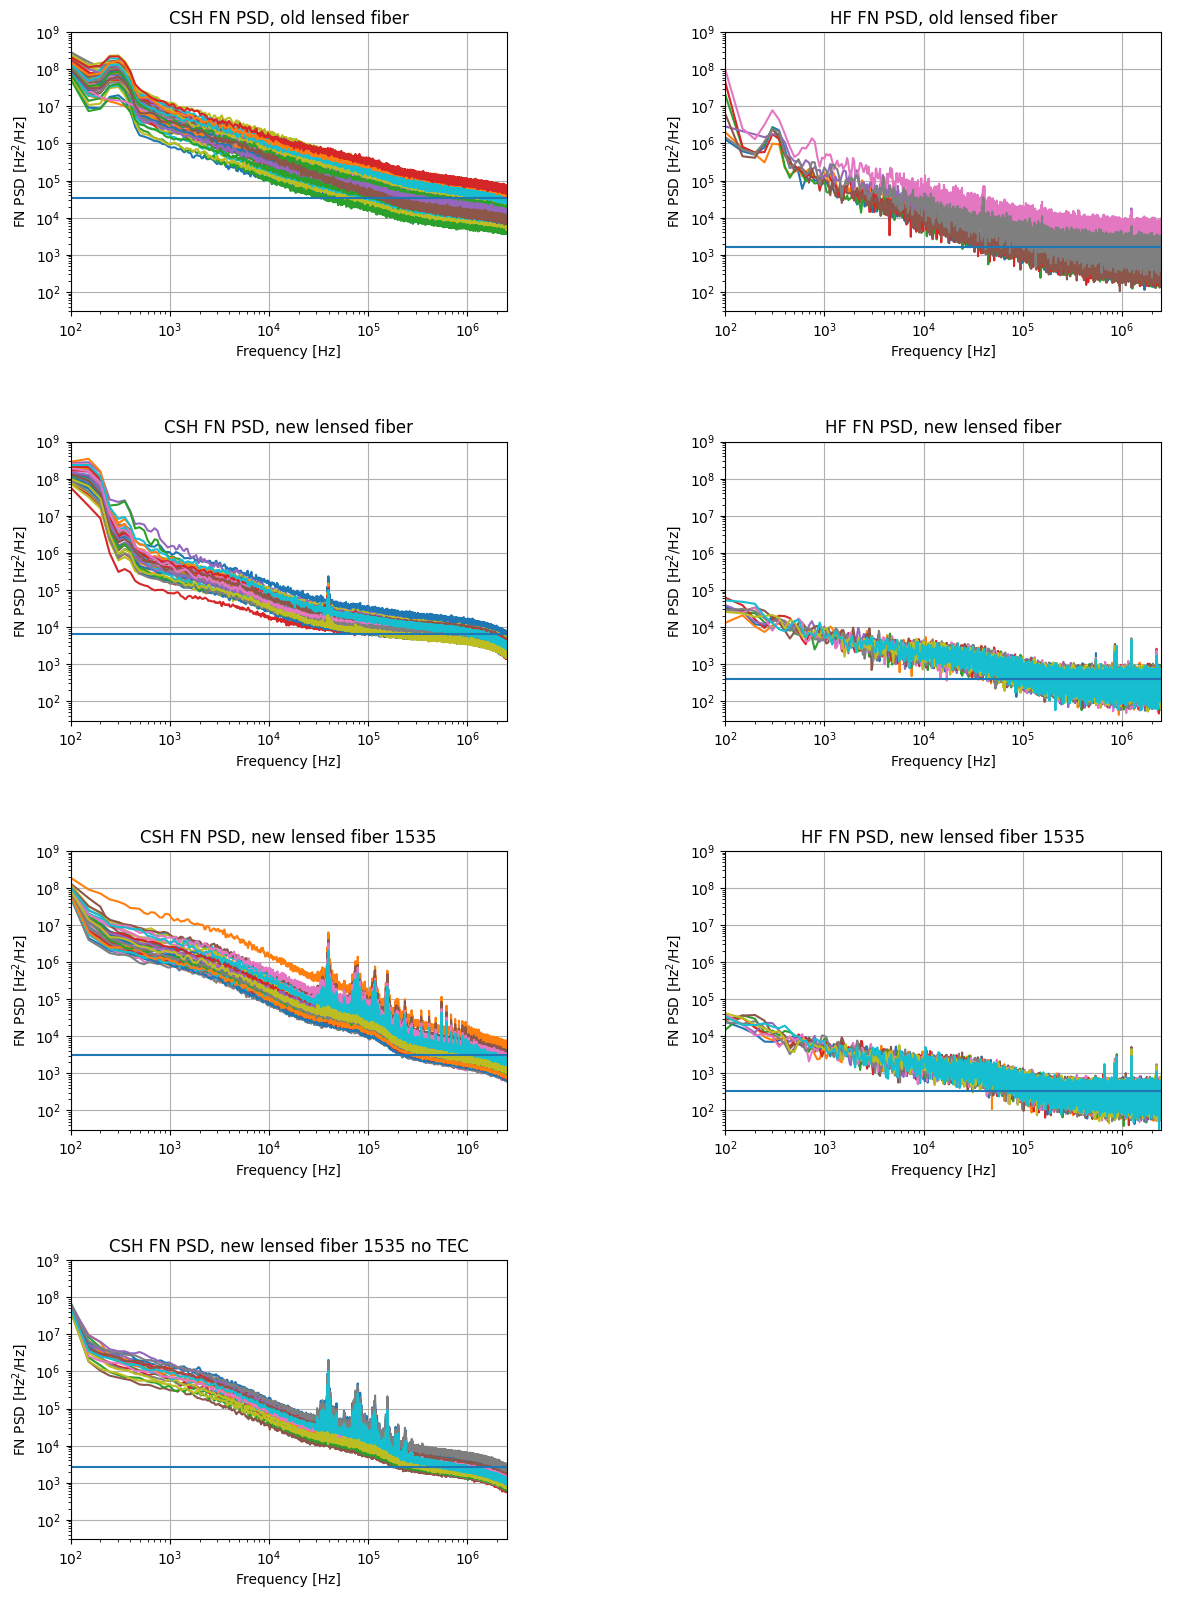

In [5]:
# ylims = [ [1e3,1e9],[1e3,1e9],[3e1,1e5],[3e1,1e8]]

FN_data_list = [data_200_old,data_hf_old,
                data_200_new,data_hf_new,
                data_200_new_1535,data_hf_new_1535,
                data_200_new_1535_no_TEC]

no_FN_data = len(FN_data_list)

no_rows = no_FN_data//2 + (no_FN_data%2 > 0)
fig = plt.figure(figsize=(12,4*no_rows))
subfigs = fig.subfigures(no_rows, 2,height_ratios=[1]*no_rows,hspace=0.1)


for j,data in enumerate(FN_data_list):
    ax = subfigs[j//2, j%2].add_subplot(111)
    for i in range(len(data[1])):
        ax.plot(data[1][i],data[2][i],label=f'{i}')
    
    # Add proper spacing within each subfigure
    subfigs[j//2, j%2].subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.9)

    if j%2 == 0:
        ax.title.set_text('CSH FN PSD, ' + stat_data[j][0][11:14] + ' lensed fiber' + stat_data[j][0][14:])
            
    elif j%2 ==1:
        ax.title.set_text('HF FN PSD, ' + stat_data[j][0][3:6] + ' lensed fiber' + stat_data[j][0][6:])

    ax.axhline(y=stat_data[j][1]*1e3/np.pi, xmin=0, xmax=1)

    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([1e2,2.5e6])
    # plt.ylim(ylims[j])
    plt.ylim([3e1,1e9])
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('FN PSD [Hz$^2$/Hz]')
    # plt.title('Frequency Noise Power Spectral Density')
    plt.grid(True, which='major')
    # plt.legend()
    # plt.show()
    # plt.tight_layout()



[ 0.         -0.12199987 -0.0934999  ... -0.00460032  0.00860006
 -0.02390016]
[ 0.          0.02599987 -0.07760026 ...  0.51979981  0.53729997
  0.54179994]
{'mean': -0.03242332380100538, 'std': 0.03128257702550691, 'peak_to_peak': 0.202700288}
{'mean': -0.30065324868431204, 'std': 0.5058339647039815, 'peak_to_peak': 2.296100096}


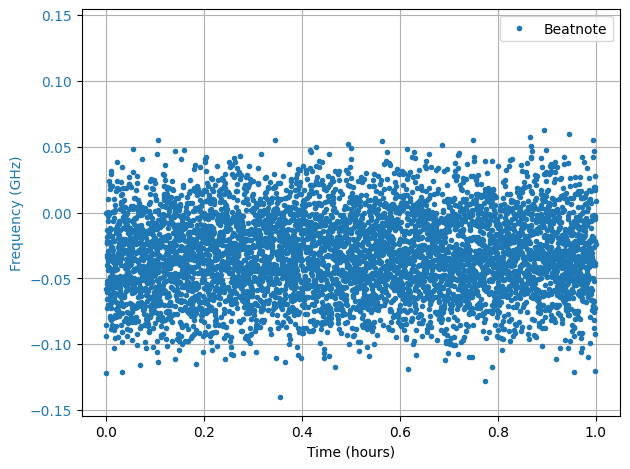

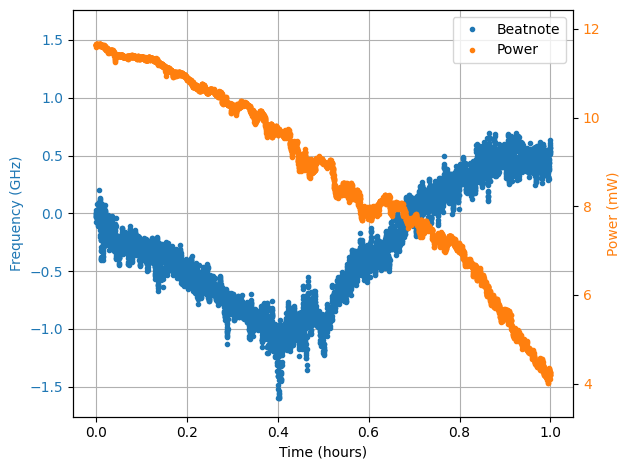

In [6]:
ref_dict = bd.analyze_and_plot_beatnote(r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Old_lensed_fiber\Beatnote\2025-05-01_13-16-16-453345esa.txt")
beatnote_dict = bd.analyze_and_plot_beatnote(r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\Old_lensed_fiber\Beatnote\2025-05-05_13-57-36-168640esa.txt")
print(ref_dict)
print(beatnote_dict)

In [7]:
pm_data = pd.read_csv(r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Weird_data\New_lensed_fiber\Power_sample.csv")
pm_mean = float(pm_data.values[18][0][6:-2])*1e3
pm_std = float(pm_data.values[19][0][20:-2])*1e3

print(pm_mean,pm_std)



24.363 0.00870822163022882
